In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

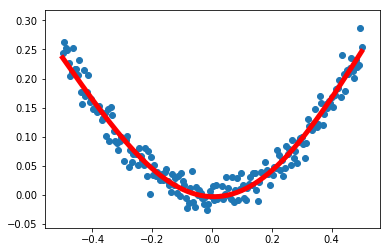

In [3]:
# 生成200随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise

# 两个初始变量值
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])


# 神经网络隐藏层
weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
wx_plus_b_L1 = tf.matmul(x,weights_L1) + biases_L1
L1 = tf.nn.tanh(wx_plus_b_L1)

# 神经网络输出层
weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
wx_plus_b_L2 = tf.matmul(L1,weights_L2) + biases_L2
prediction = tf.nn.tanh(wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初始化变量
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(2000):
        sess.run(train,feed_dict={x:x_data,y:y_data})
    
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()

In [54]:
# 测试placeholder的用法
a_data = 123
input1 = tf.placeholder(tf.float32)
with tf.Session() as sess:
    print(sess.run(input1,feed_dict={input1:a_data}))

123.0
